In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [ ]:
# Carregar conjunto de dados CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Pré-processamento dos dados
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

170498071/170498071 [==============================] - 3s 0us/step


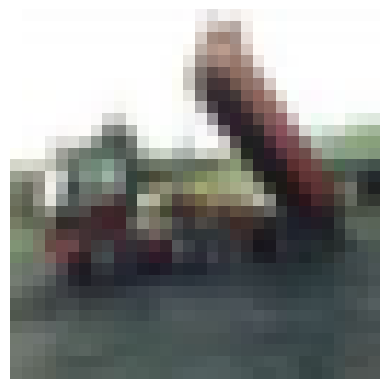

In [ ]:
# Selecionar uma imagem específica
image_index = 2
image = X_train[image_index]

# Exibir essa imagem
plt.imshow(image)
plt.axis('off')  # Desabilitar os eixos
plt.show()

In [ ]:
# Dividir conjunto de treinamento em treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Definir arquitetura da CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Treinamento da CNN
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
313/313 [==============================] - 67s 203ms/step - loss: 1.7015 - accuracy: 0.3753 - val_loss: 1.4875 - val_accuracy: 0.4606
Epoch 2/10
313/313 [==============================] - 63s 203ms/step - loss: 1.3570 - accuracy: 0.5120 - val_loss: 1.2850 - val_accuracy: 0.5378
Epoch 3/10
313/313 [==============================] - 62s 197ms/step - loss: 1.2256 - accuracy: 0.5651 - val_loss: 1.1726 - val_accuracy: 0.5847
Epoch 4/10
313/313 [==============================] - 62s 199ms/step - loss: 1.1322 - accuracy: 0.5983 - val_loss: 1.1231 - val_accuracy: 0.6000
Epoch 5/10
313/313 [==============================] - 63s 200ms/step - loss: 1.0542 - accuracy: 0.6266 - val_loss: 1.0428 - val_accuracy: 0.6304
Epoch 6/10
313/313 [==============================] - 61s 194ms/step - loss: 0.9868 - accuracy: 0.6549 - val_loss: 0.9914 - val_accuracy: 0.6489
Epoch 7/10
313/313 [==============================] - 60s 191ms/step - loss: 0.9391 - accuracy: 0.6673 - val_loss: 0.9910 - val_ac

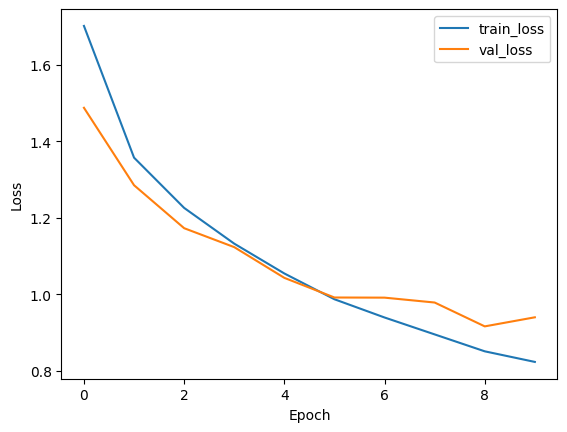

In [ ]:
# Plotar curvas de erro de treinamento e validação
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Avaliação do modelo no conjunto de teste
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1_scores = f1_score(y_test_classes, y_pred_classes, average=None)

313/313 [==============================] - 4s 14ms/step


In [ ]:
# Printando métricas
print('Acurácia: {:.4f}\n'.format(accuracy))
print('F1-score por classe:')
for i, f1_score_class in enumerate(f1_scores):
    print('Classe {}: {:.4f}'.format(i, f1_score_class))

Acurácia: 0.6728

F1-score por classe:
Classe 0: 0.7257
Classe 1: 0.7826
Classe 2: 0.5438
Classe 3: 0.5149
Classe 4: 0.5906
Classe 5: 0.5601
Classe 6: 0.7337
Classe 7: 0.7325
Classe 8: 0.7788
Classe 9: 0.7707
